In [17]:
import pandas as pd
import os
import re
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
# Set the maximum column width to a larger value
pd.set_option('display.max_colwidth', 1000)  # Adjust the value as needed

# Set the maximum number of rows to display, if needed
pd.set_option('display.max_rows', None)  # To display all rows

In [18]:
data=pd.read_csv("../data/barott_sim.csv")

In [19]:
data.shape

(27506, 33)

In [20]:
data.head(10)

,Sentence,Cohort,Filename,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented
0,Things are actually going pretty well.,ALL+SB,ms_08_0024,0.377971,0.395774,0.526251,0.516366,0.462923,0.382480,0.535844,0.463762,0.352279,0.308740,0.494940,0.469662,0.451295,0.378318,0.445809,0.324942,0.393653,0.363102,0.552168,0.483828,0.327567,0.331489,0.536507,0.380507,0.397595,0.445604,0.485459,0.490254,0.388137,0.474632
1,Im moving out of my parents house tomorrow.,ALL+SB,ms_08_0024,0.424221,0.479348,0.527292,0.535880,0.495578,0.459628,0.551422,0.505344,0.445146,0.414328,0.562316,0.491254,0.545583,0.435846,0.522178,0.476237,0.478099,0.484571,0.488105,0.501969,0.467135,0.452903,0.553216,0.528678,0.508806,0.534768,0.549076,0.576317,0.431185,0.552674
2,So things have been going pretty good.,ALL+SB,ms_08_0024,0.391251,0.417265,0.471363,0.490854,0.419436,0.378361,0.517336,0.433610,0.332624,0.333952,0.493618,0.466700,0.454972,0.387112,0.450088,0.355940,0.396553,0.358819,0.524699,0.478019,0.337624,0.346534,0.533100,0.405492,0.399435,0.436650,0.466405,0.476218,0.385155,0.439441
3,Im looking for a new job.,ALL+SB,ms_08_0024,0.493893,0.524431,0.562372,0.552473,0.541880,0.504158,0.561316,0.505378,0.492707,0.514073,0.622128,0.526609,0.636818,0.476844,0.542850,0.582138,0.508223,0.520492,0.476088,0.562951,0.540398,0.503957,0.583397,0.591935,0.544744,0.529644,0.550075,0.630965,0.494193,0.560858
4,I wanted to do something along the lines of case managing but I kind of am just finding stuff in the field instead of that kind of exact position.,ALL+SB,ms_08_0024,0.520227,0.586449,0.541049,0.535913,0.475782,0.474051,0.630488,0.527489,0.408410,0.425373,0.574266,0.596604,0.638625,0.510954,0.655193,0.475727,0.506723,0.600321,0.540584,0.604998,0.433778,0.527392,0.665822,0.534066,0.569250,0.627148,0.656628,0.613975,0.423881,0.579861
5,Yeah kind of.,ALL+SB,ms_08_0024,0.488930,0.541736,0.541846,0.594465,0.540279,0.536690,0.491857,0.517125,0.509249,0.472082,0.502090,0.493986,0.538018,0.583053,0.498120,0.528219,0.533799,0.468959,0.451668,0.502351,0.517951,0.487825,0.466882,0.521212,0.448984,0.475195,0.465700,0.457522,0.586432,0.517657
6,No. So I graduated with a psychology degree.,ALL+SB,ms_08_0024,0.536562,0.595502,0.582375,0.579633,0.542106,0.557552,0.584844,0.588022,0.532986,0.529516,0.625332,0.572906,0.659850,0.555591,0.606513,0.568662,0.602640,0.537808,0.559579,0.613699,0.541424,0.528924,0.590801,0.600690,0.553553,0.590213,0.596475,0.589426,0.543445,0.622427
7,Thats another thing thats going pretty well actually.,ALL+SB,ms_08_0024,0.404202,0.442937,0.493528,0.468773,0.379794,0.399951,0.520609,0.445354,0.355667,0.365950,0.456709,0.495717,0.461274,0.403511,0.494562,0.383987,0.435078,0.485462,0.488878,0.484568,0.362553,0.430657,0.526978,0.446442,0.446083,0.487625,0.504033,0.495645,0.399686,0.472407
8,I just got my thing,ALL+SB,ms_08_0024,0.545042,0.634996,0.636985,0.565647,0.557005,0.603776,0.598731,0.581361,0.556087,0.557624,0.563589,0.540132,0.632973,0.604757,0.589797,0.633634,0.601522,0.549570,0.480762,0.574184,0.584747,0.602903,0.570894,0.624452,0.571200,0.541017,0.551231,0.545015,0.590757,0.582684
9,So yeah I was kind of just looking for jobs in the psychology field.,ALL+SB,ms_08_0024,0.479329,0.57595

In [21]:
data = data.drop(columns=['Sentence'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27506 entries, 0 to 27505
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cohort                                                 27506 non-null  object 
 1   Filename                                               27506 non-null  object 
 2   I plan tasks carefully                                 27506 non-null  float64
 3   I do things without thinking                           27506 non-null  float64
 4   I make up my mind quickly                              27506 non-null  float64
 5   I am happy-go-lucky                                    27506 non-null  float64
 6   I don't pay attention                                  27506 non-null  float64
 7   I have racing thoughts                                 27506 non-null  float64
 8   I plan trips well ahead of time               

In [23]:
data['Cohort']=data['Cohort'].replace('HC',0)
data['Cohort']=data['Cohort'].replace('ALL-SB',1)
data['Cohort']=data['Cohort'].replace('ALL+SB',2)

/var/folders/z4/3rsgqylj0js6lvck7xgrvck80000gn/T/ipykernel_59065/2055383574.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Cohort']=data['Cohort'].replace('ALL+SB',2)


In [24]:
grouped_data = data.groupby('Filename').mean().reset_index()

In [25]:
grouped_data

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented
0,ms_00_0002,0.0,0.481567,0.534834,0.507075,0.510670,0.459575,0.494764,0.537418,0.501579,0.440815,0.484231,0.547468,0.520894,0.540541,0.500092,0.557869,0.507860,0.511504,0.526789,0.469594,0.529332,0.473597,0.514074,0.540698,0.543696,0.541789,0.534844,0.540897,0.557287,0.477963,0.511272
1,ms_00_0003,0.0,0.462437,0.538969,0.506255,0.515196,0.463867,0.484367,0.538390,0.488764,0.414163,0.459202,0.552635,0.513846,0.535310,0.508581,0.565104,0.493120,0.497733,0.530395,0.476465,0.517579,0.457132,0.510813,0.561242,0.533308,0.534790,0.537451,0.549255,0.553754,0.465840,0.496157
2,ms_00_0005,0.0,0.497811,0.563684,0.528875,0.531636,0.494002,0.509782,0.553104,0.526750,0.462394,0.497824,0.571962,0.542037,0.556700,0.531945,0.575905,0.528365,0.531985,0.538745,0.486289,0.547254,0.502088,0.532066,0.562179,0.565329,0.548029,0.542355,0.552482,0.574159,0.510704,0.529238
3,ms_00_0006,0.0,0.474585,0.535073,0.517349,0.525543,0.473344,0.501965,0.533634,0.501835,0.448377,0.484536,0.544802,0.514265,0.539854,0.512192,0.555084,0.510386,0.512049,0.515829,0.470008,0.520018,0.481364,0.510034,0.541939,0.545059,0.521198,0.518885,0.537946,0.550399,0.497735,0.514226
4,ms_00_0007,0.0,0.480476,0.541566,0.519077,0.519773,0.470967,0.489602,0.546314,0.505617,0.439323,0.479902,0.547199,0.529044,0.535461,0.509445,0.560630,0.509268,0.512998,0.527296,0.481950,0.532965,0.477009,0.506244,0.564455,0.543608,0.535754,0.533942,0.553002,0.552101,0.482515,0.518712
5,ms_00_0008,0.0,0.488574,0.545630,0.527725,0.520996,0.467537,0.501073,0.551434,0.508667,0.443442,0.482719,0.558930,0.544058,0.560586,0.509055,0.576617,0.506925,0.512845,0.549735,0.479948,0.551123,0.477662,0.517146,0.575512,0.551481,0.549039,0.551256,0.567301,0.580319,0.478615,0.524127
6,ms_00_0009,0.0,0.470437,0.526630,0.504515,0.522063,0.436623,0.484729,0.538068,0.496136,0.422351,0.476401,0.538904,0.518449,0.539346,0.492871,0.560645,0.494854,0.506338,0.519697,0.484475,0.525977,0.467635,0.498726,0.563803,0.539099,0.529365,0.527915,0.566302,0.553715,0.460712,0.522038
7,ms_00_0010,0.0,0.482187,0.544641,0.525126,0.526451,0.458718,0.490771,0.552669,0.521197,0.434051,0.473560,0.550584,0.543972,0.546745,0.507107,0.583415,0.496924,0.516346,0.540767,0.499885,0.549090,0.474442,0.502829,0.583555,0.543611,0.539954,0.554086,0.578033,0.563540,0.471631,0.533000
8,ms_00_0011,0.0,0.489821,0.547578,0.515097,0.517696,0.458899,0.502548,0.548534,0.508454,0.446342,0.488027,0.550442,0.540844,0.556300,0.508021,0.590004,0.510158,0.525445,0.553342,0.486759,0.548976,0.480426,0.519909,0.562968,0.556311,0.544266,0.556525,0.568298,0.561884,0.488583,0.534487
9,ms_00_0012,0.0,0.490212,0.554448,0.510304,0.519873,0.463499,0.493128,0.554425,0.515736,0.435835,0.485602,0.562389,0.543794,0.557109,0.510861,0.588909,0.518415,0.512788,0.550696,0.474402,0.547408,0.477494,0.526782,0.567963,0.563653,0.562855,0.549785,0.565523,0.579970,0.490665,0.527448


In [26]:
healthy_df = grouped_data[grouped_data["Cohort"]==0.0]
all_minus_sb_df = grouped_data[grouped_data["Cohort"]==1.0]
all_plus_sb_df = grouped_data[grouped_data["Cohort"]==2.0]


In [27]:
healthy_df.shape

(29, 32)

In [28]:
all_minus_sb_df.shape

(62, 32)

In [29]:
all_plus_sb_df.shape

(19, 32)

In [30]:
healthy_df.columns[2:32]

Index(['I plan tasks carefully', 'I do things without thinking',
       'I make up my mind quickly', 'I am happy-go-lucky',
       'I don't pay attention', 'I have racing thoughts',
       'I plan trips well ahead of time', 'I am self-controlled',
       'I concentrate easily', 'I save regularly',
       'I squirm at plays or lectures', 'I am a careful thinker',
       'I plan for job security', 'I say things without thinking',
       'I like to think about complex problems', 'I change jobs',
       'I act on impulse', 'I get easily bored when solving thought problems',
       'I act on the spur of the moment', 'I am a steady thinker',
       'I change residences', 'I buy things on impulse',
       'I can only think about one thing at a time', 'I change hobbies',
       'I spend or charge more than I earn',
       'I often have extraneous thoughts when thinking',
       'I am interested in the present rather than the future',
       'I am restless at the theater or lectures', 'I like p

/var/folders/z4/3rsgqylj0js6lvck7xgrvck80000gn/T/ipykernel_59065/799896402.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


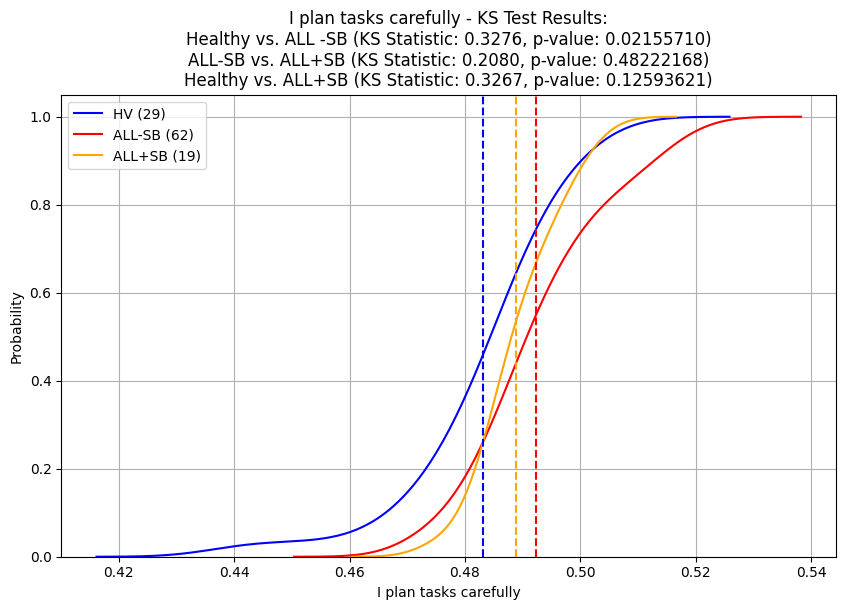

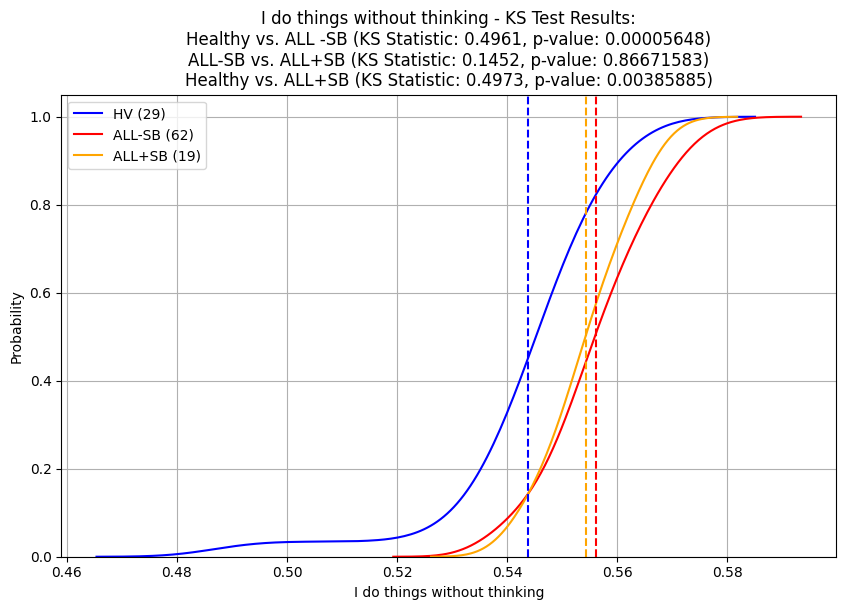

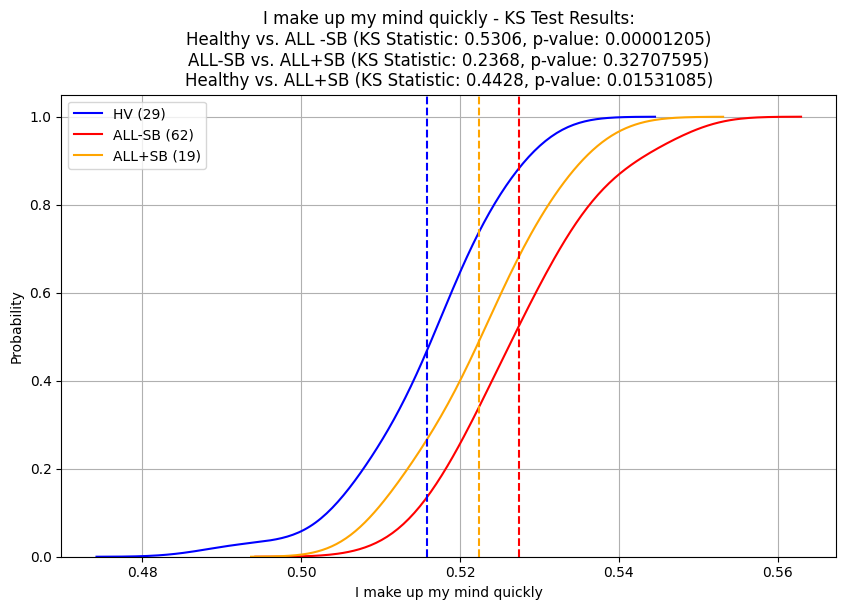

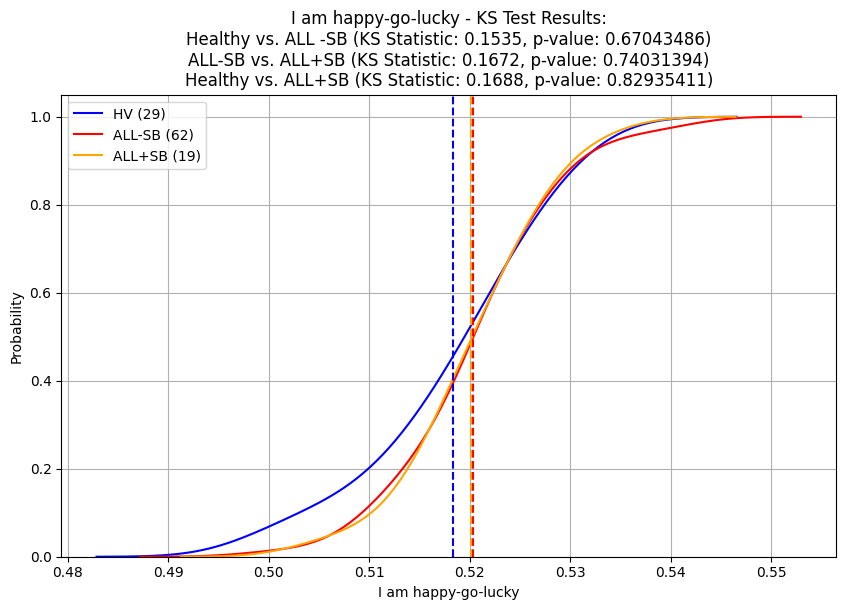

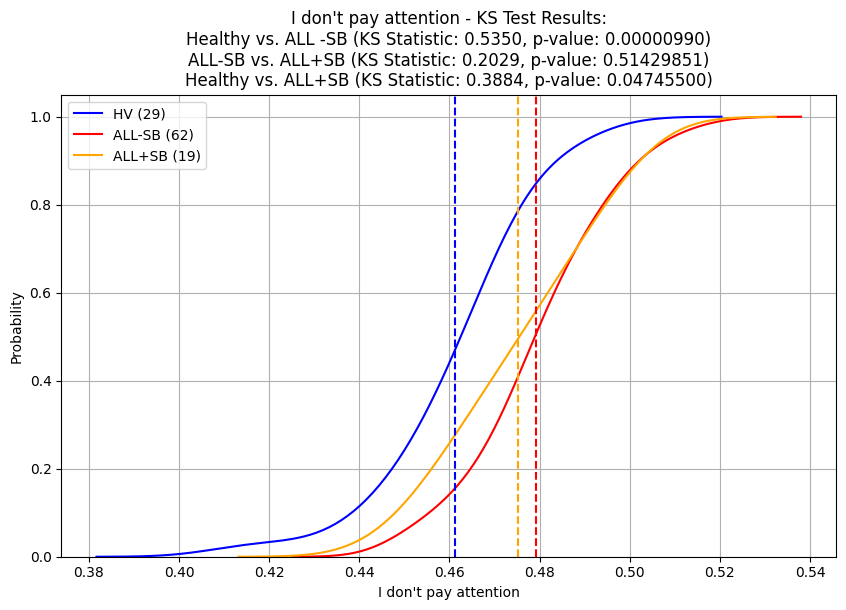

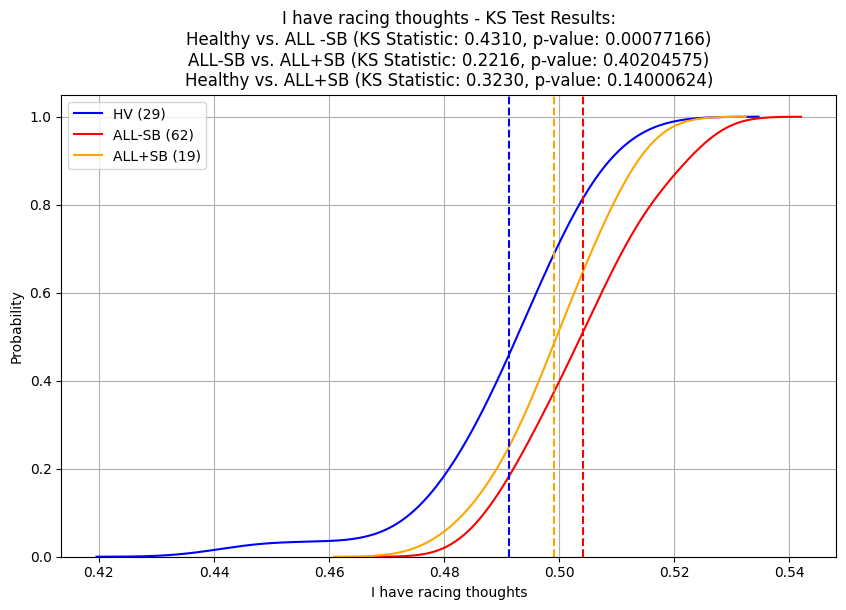

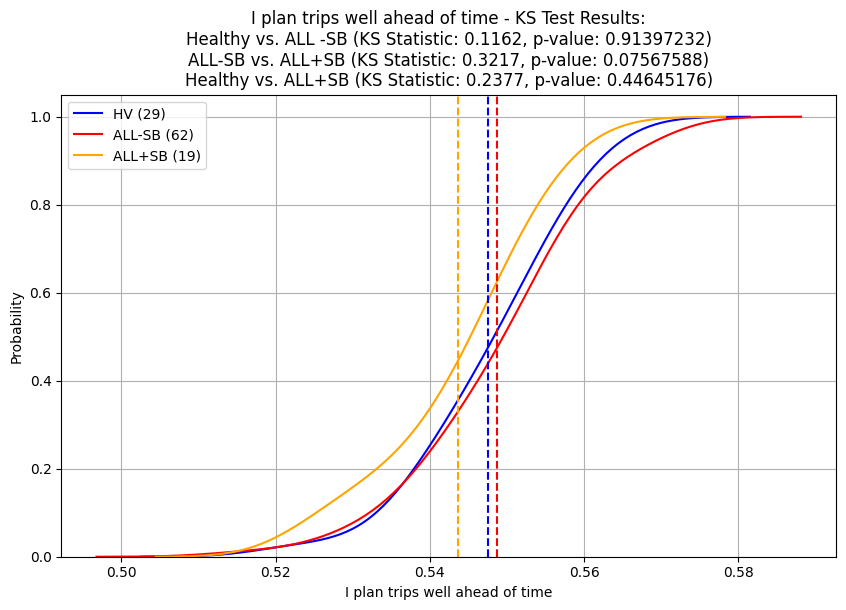

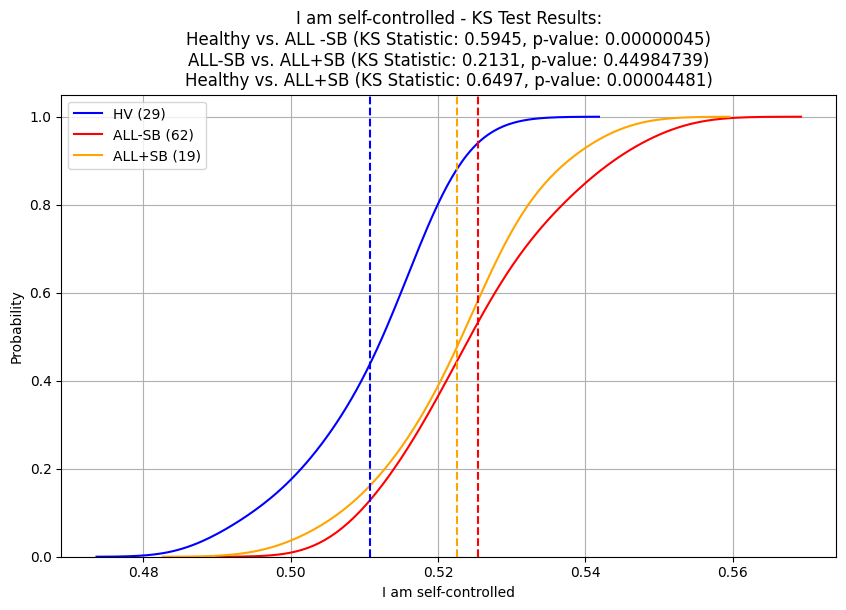

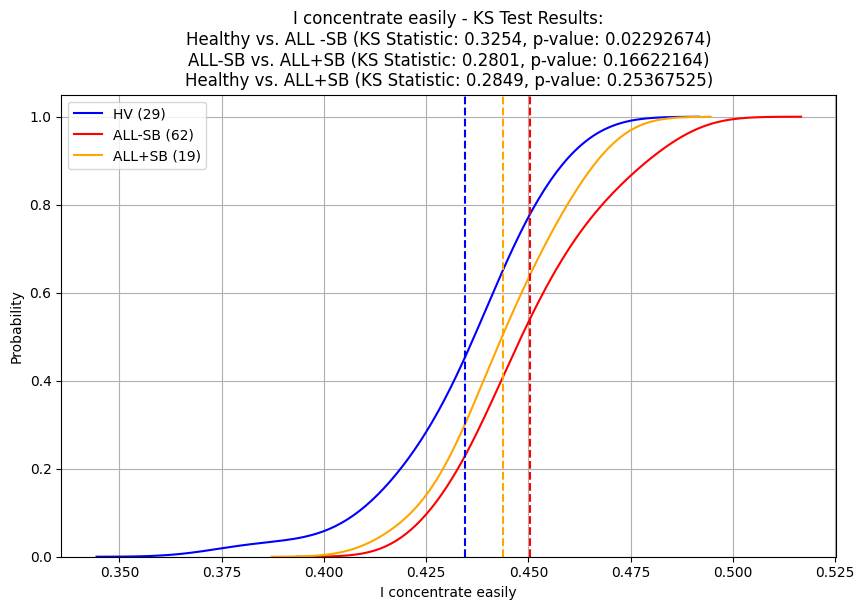

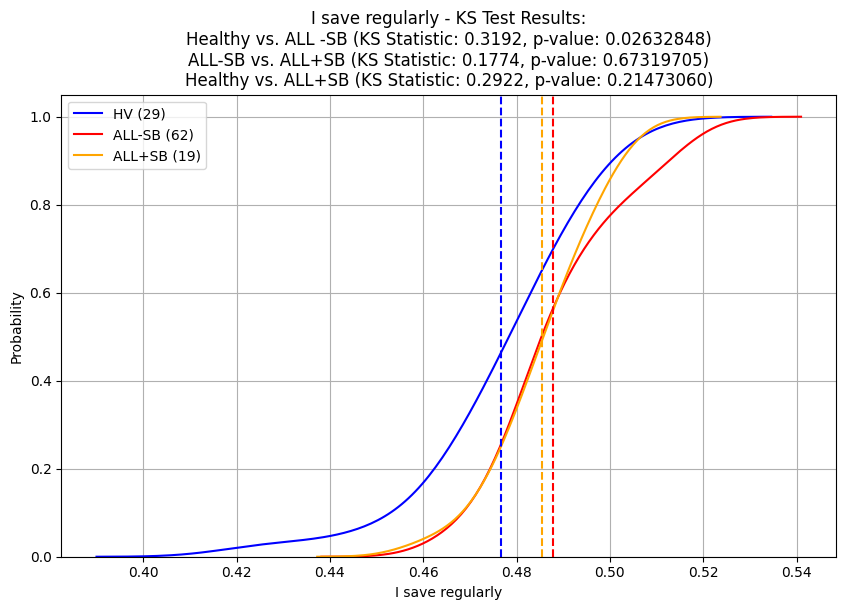

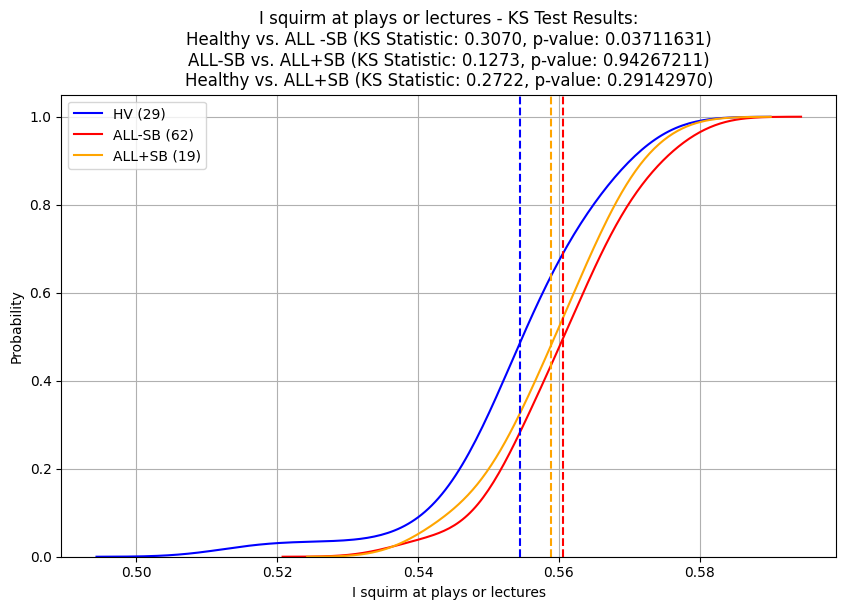

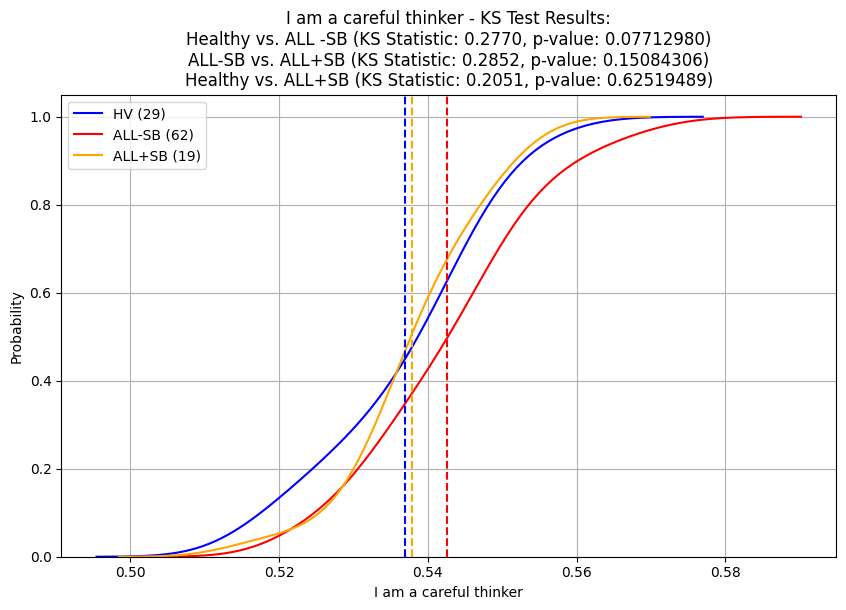

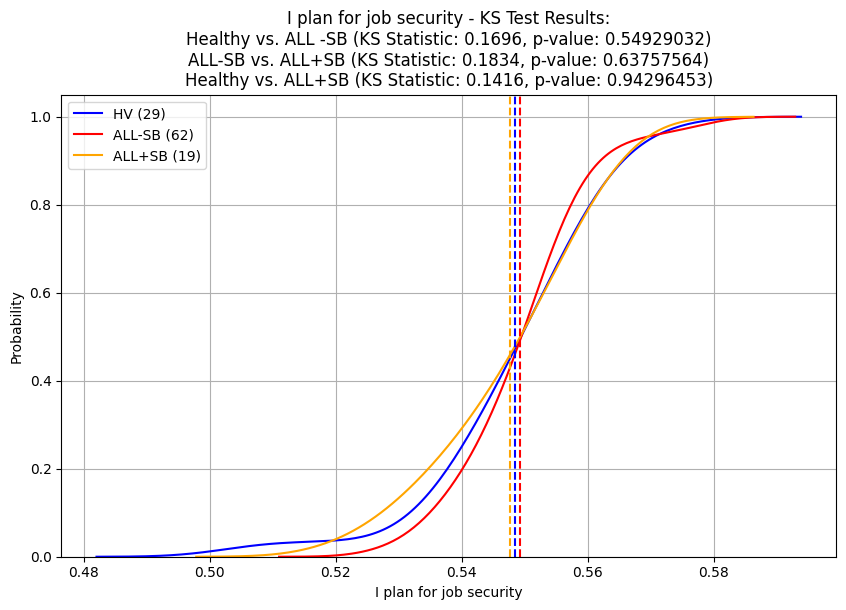

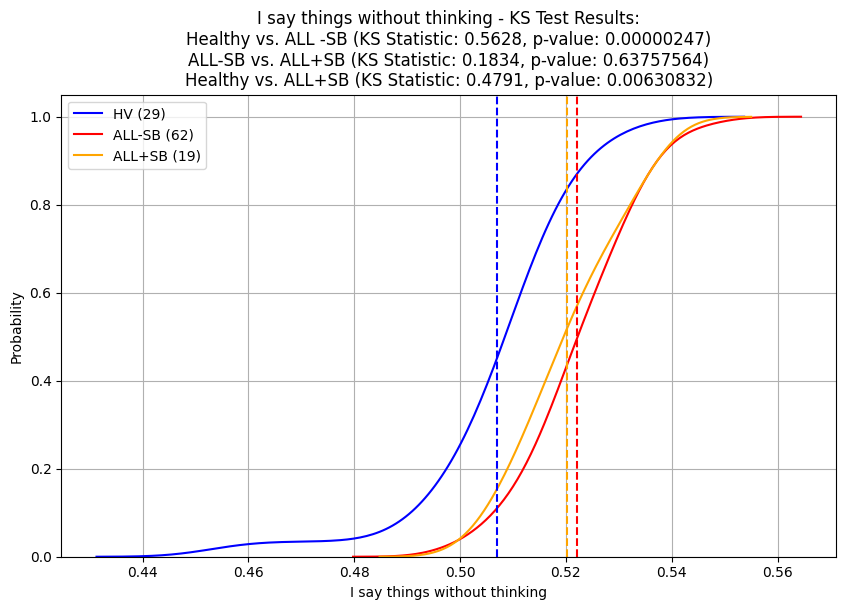

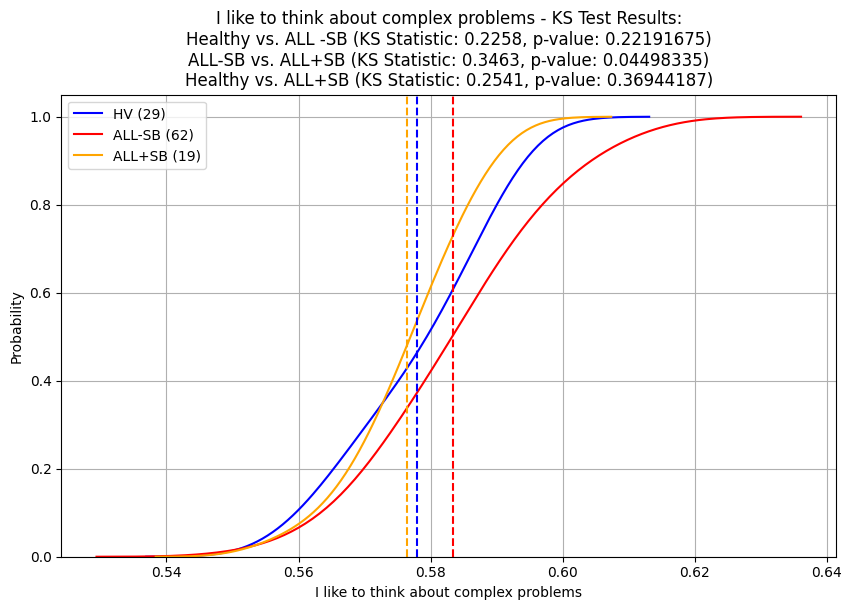

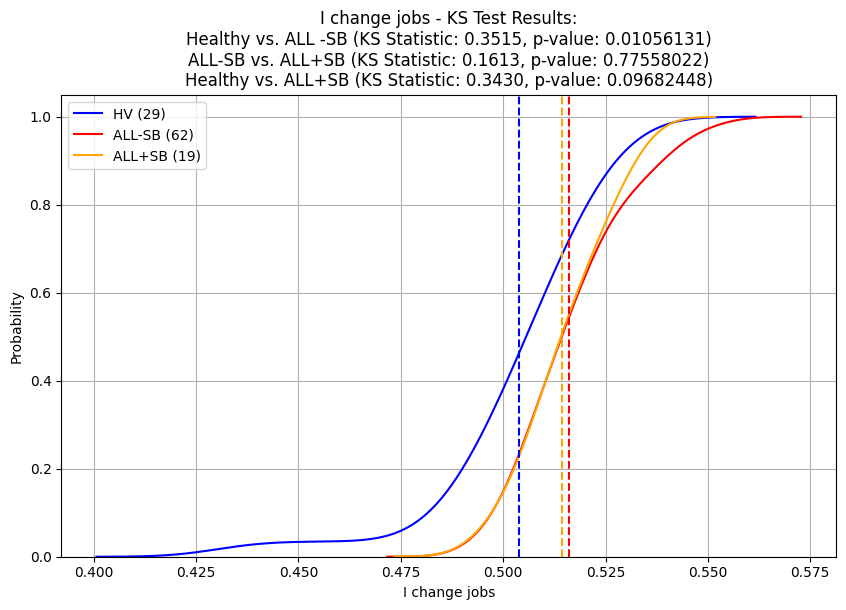

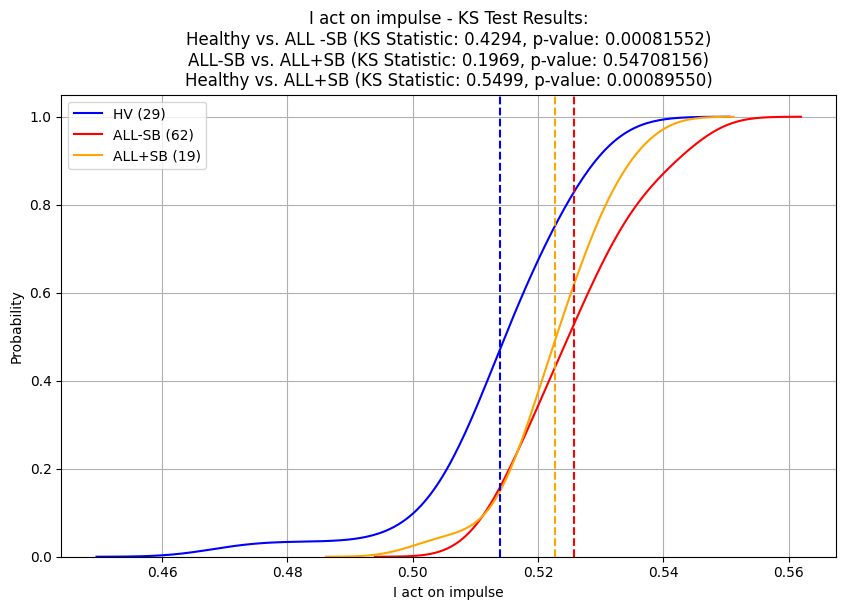

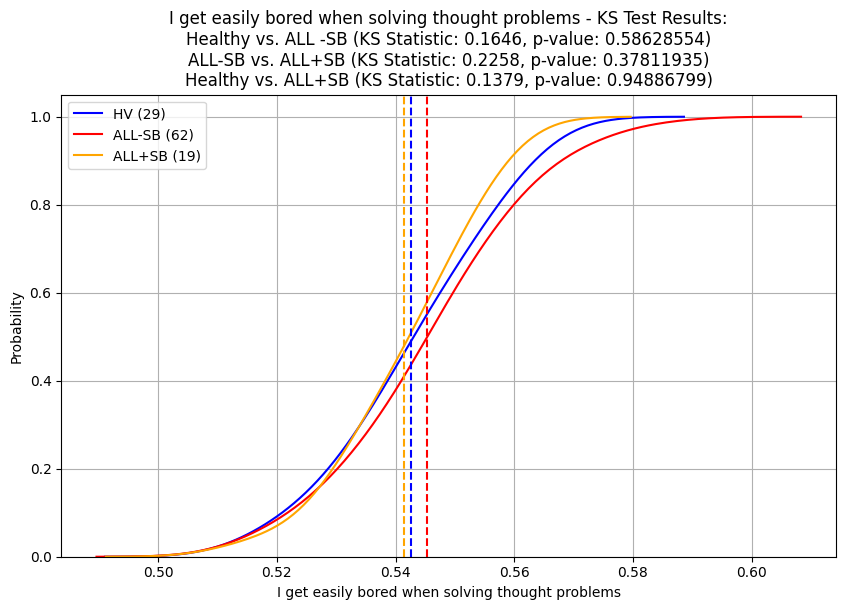

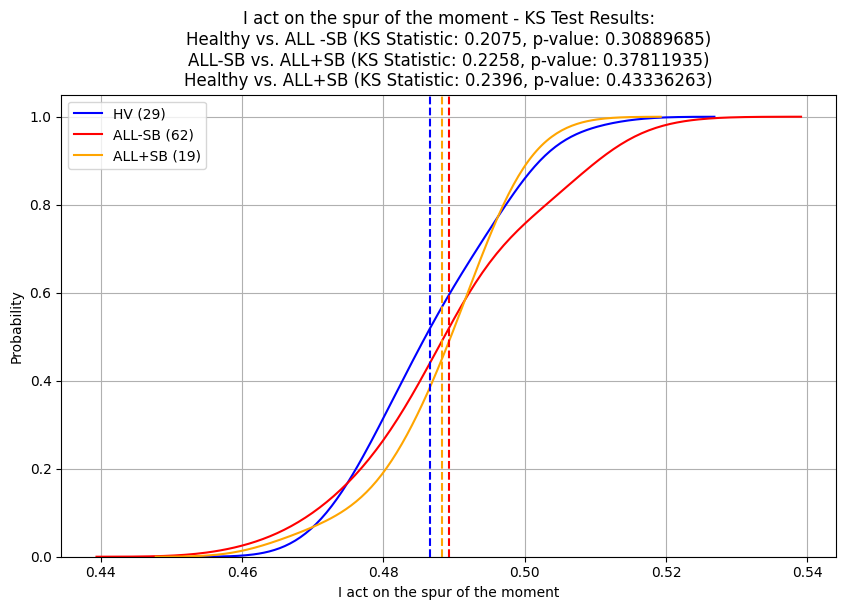

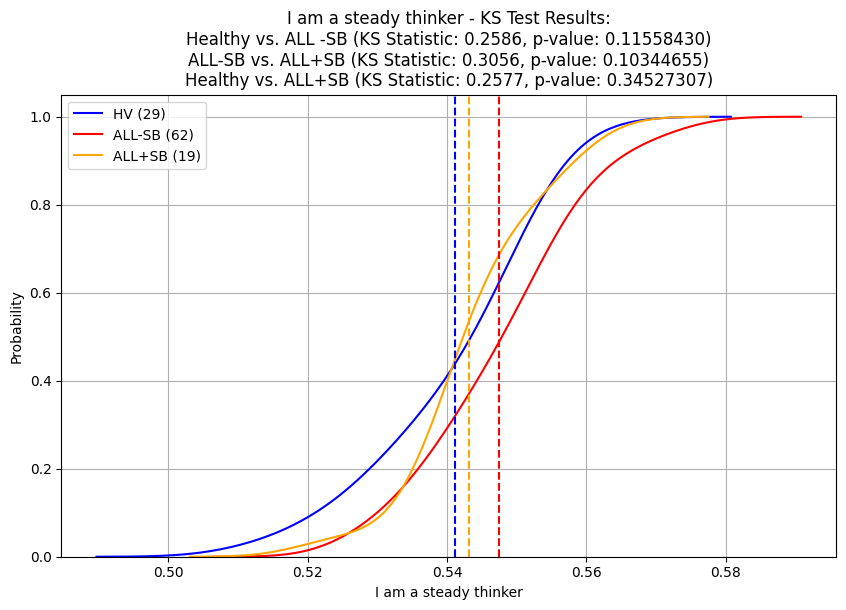

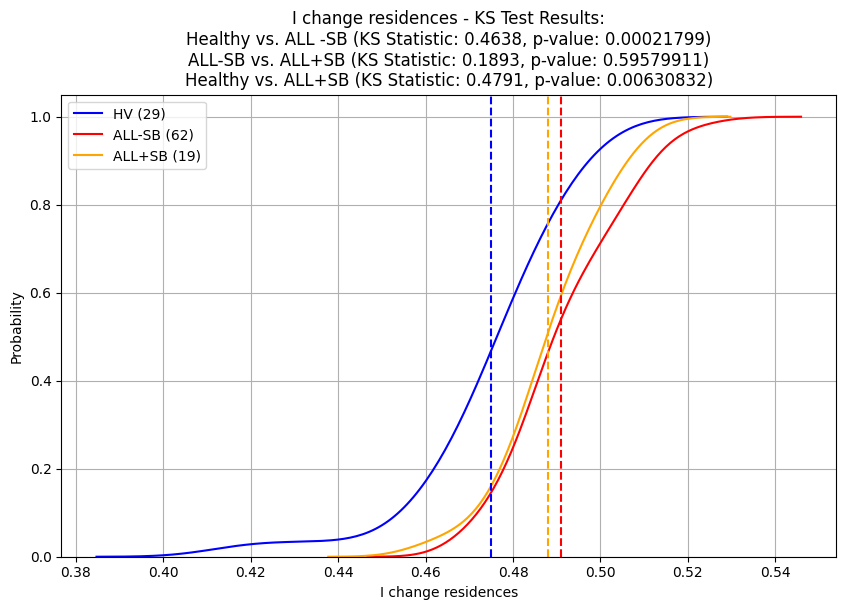

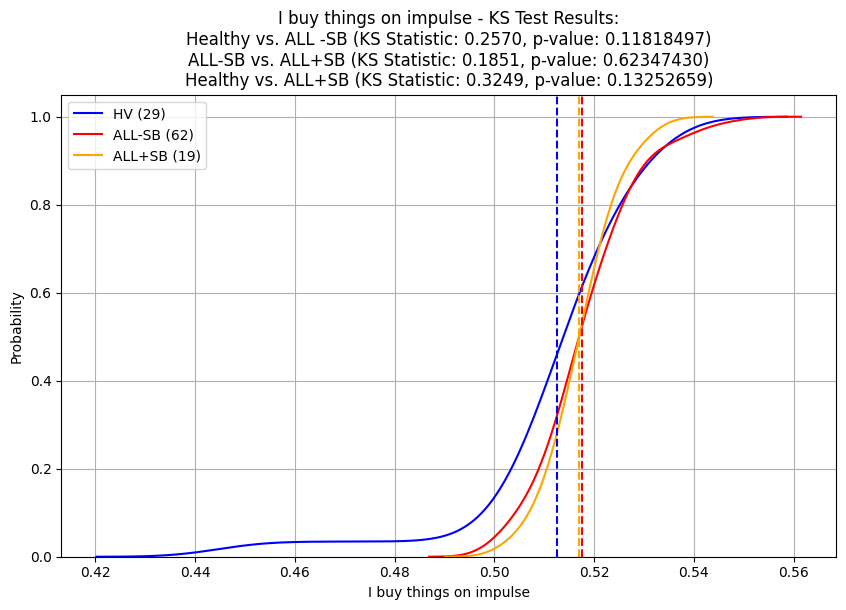

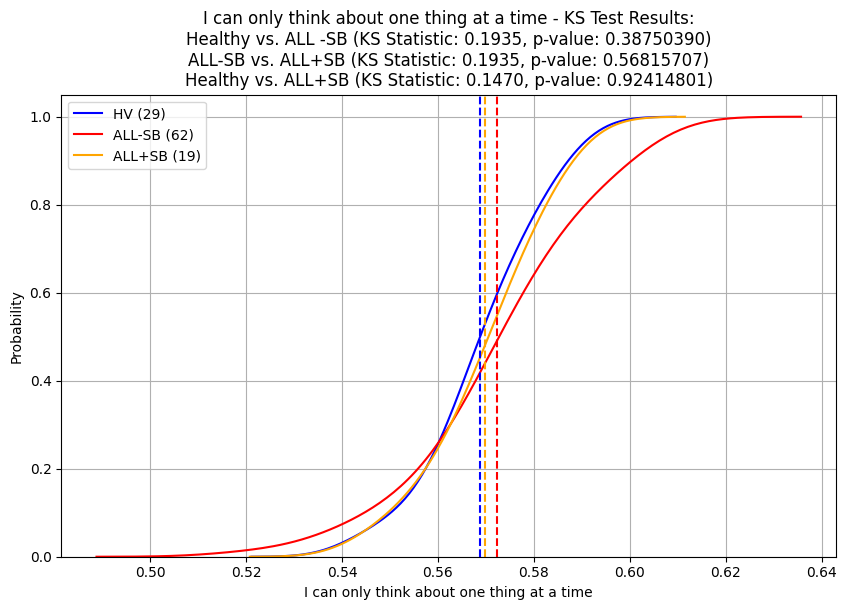

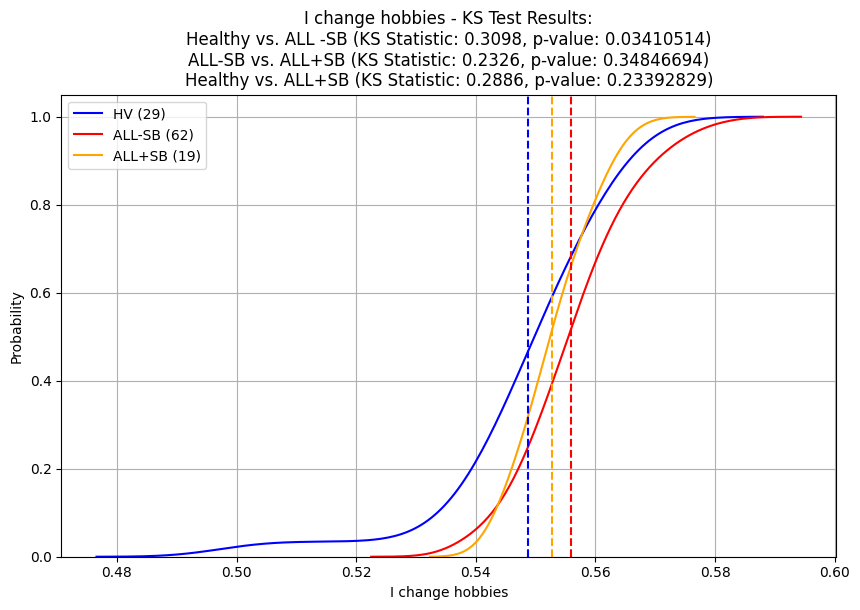

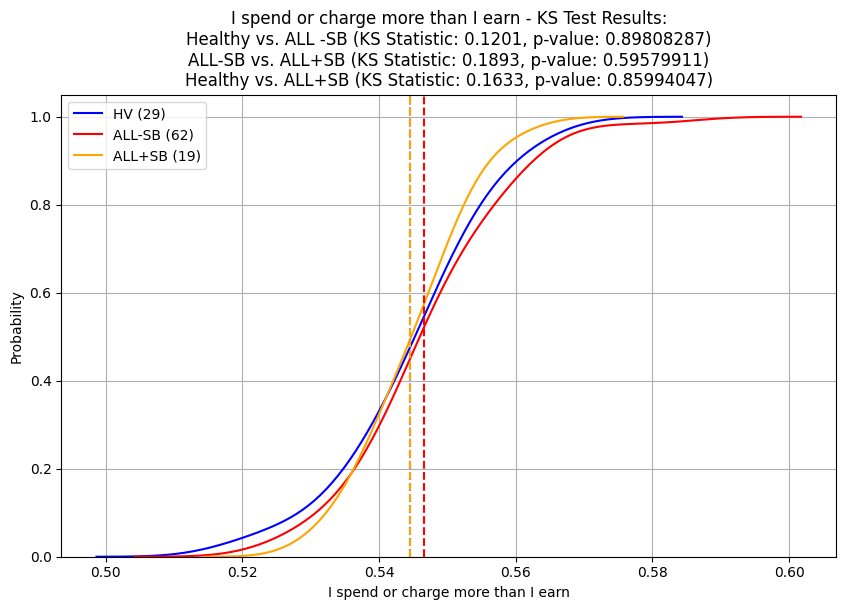

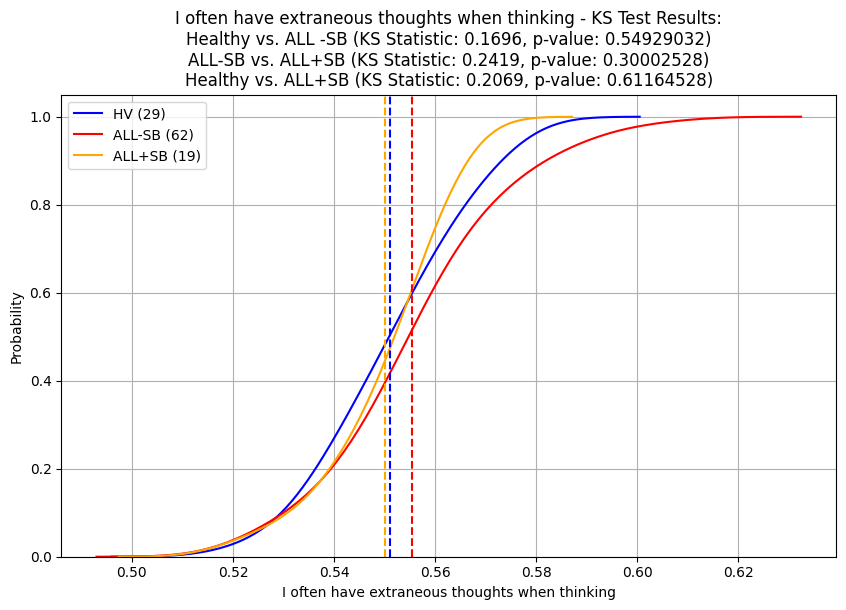

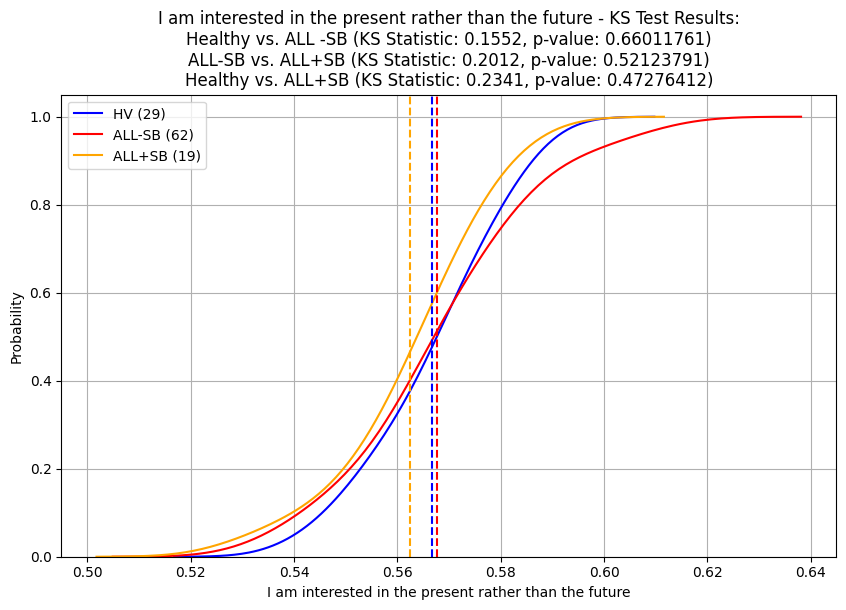

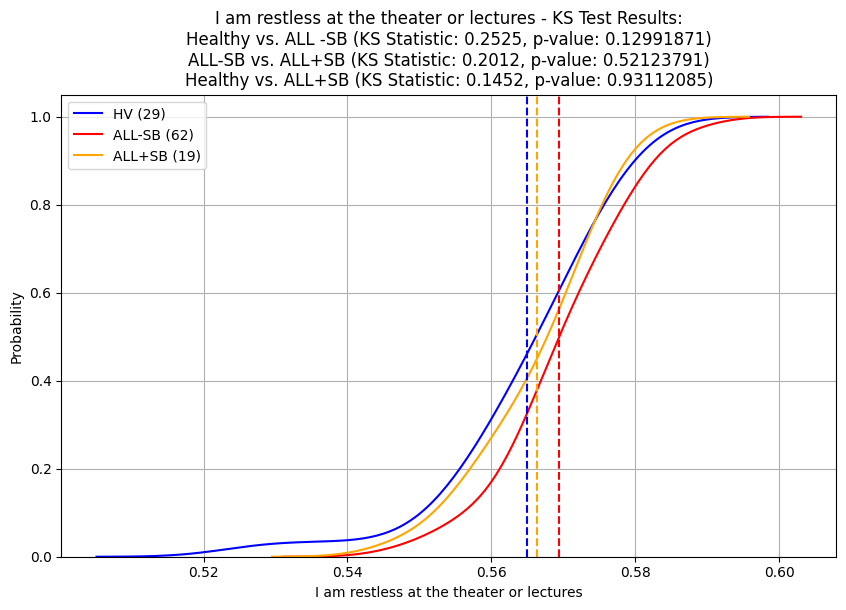

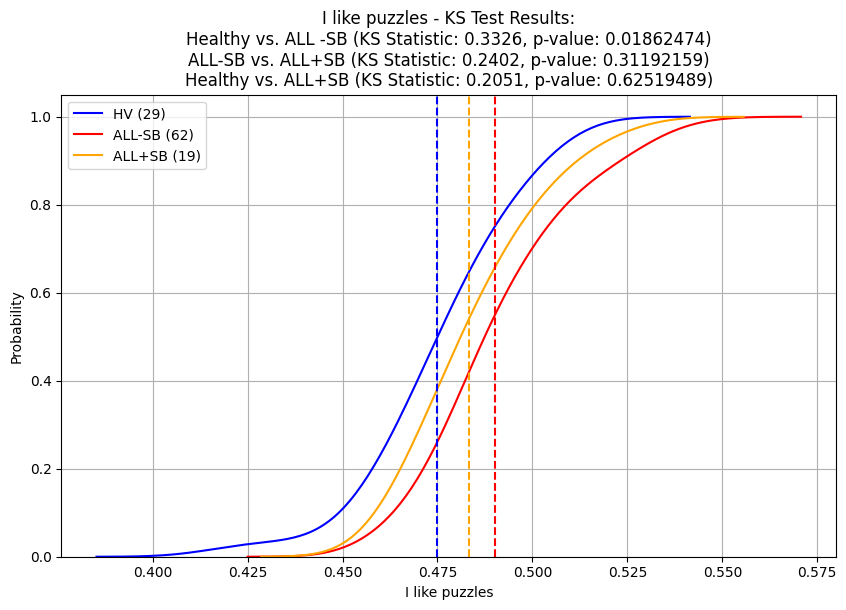

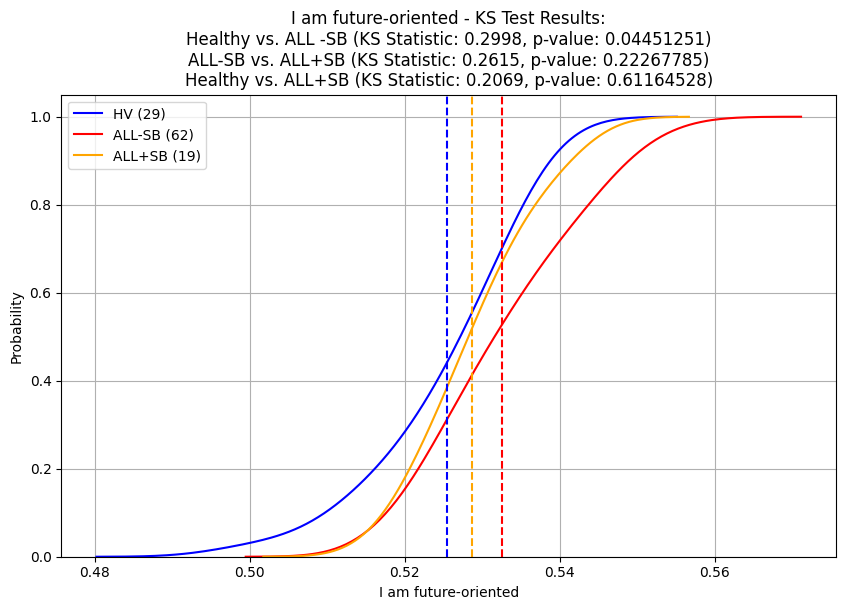

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp
from matplotlib.backends.backend_pdf import PdfPages

# Define the columns to iterate
columns_to_iterate = healthy_df.columns[2:32]

with PdfPages('my_plots.pdf') as pdf:
    for col in columns_to_iterate:
        plt.figure(figsize=(10, 6))

        # Create the KDE plots for each group
        ax = sns.kdeplot(healthy_df[col], color='blue', cumulative=True, label=f'HV ({len(healthy_df)})')
        ax = sns.kdeplot(all_minus_sb_df[col], color='red', cumulative=True, label=f'ALL-SB ({len(all_minus_sb_df)})')
        ax = sns.kdeplot(all_plus_sb_df[col], color='orange', cumulative=True, label=f'ALL+SB ({len(all_plus_sb_df)})')

        # Calculate KS test statistics and p-values
        ks_statistic_hv_minus, p_value_hv_minus = ks_2samp(healthy_df[col], all_minus_sb_df[col])
        ks_statistic_minus_plus, p_value_minus_plus = ks_2samp(all_minus_sb_df[col], all_plus_sb_df[col])
        ks_statistic_hv_plus, p_value_hv_plus = ks_2samp(healthy_df[col], all_plus_sb_df[col])

        # Add vertical lines for the means
        mean_healthy = np.mean(healthy_df[col])
        mean_minus = np.mean(all_minus_sb_df[col])
        mean_plus = np.mean(all_plus_sb_df[col])

        plt.axvline(mean_healthy, color='blue', linestyle='--')
        plt.axvline(mean_minus, color='red', linestyle='--')
        plt.axvline(mean_plus, color='orange', linestyle='--')

        # Add a legend
        plt.legend()

        # Create the title with KS test results
        title = f'{col} - KS Test Results:\n'
        title += f'Healthy vs. ALL -SB (KS Statistic: {ks_statistic_hv_minus:.4f}, p-value: {p_value_hv_minus:.8f})\n'
        title += f'ALL-SB vs. ALL+SB (KS Statistic: {ks_statistic_minus_plus:.4f}, p-value: {p_value_minus_plus:.8f})\n'
        title += f'Healthy vs. ALL+SB (KS Statistic: {ks_statistic_hv_plus:.4f}, p-value: {p_value_hv_plus:.8f})'

        # Set the title and labels
        plt.title(title)
        ax.set_xlabel(col)
        ax.set_ylabel("Probability")

        plt.grid(True)
        pdf.savefig()  # saves the current figure into the pdf

    # Show or save the plots as needed
    plt.show()


In [32]:
grouped_data.to_csv("../data/SIB_impulsivity_scores.csv",index=False)